# Linear and Symbolic Algebra in Python

<a href="https://www.sympy.org/en/index.html" target="_blank"><img src="https://raw.githubusercontent.com/wlough/CU-Phys2600-Fall2025/main/lectures/img/sympy.svg" width=400px /> </a>
## PHYS 2600: Scientific Computing

## Lecture 28

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Announcements

* A note on grading, which I didn't mention on the syllabus: final letter grade numerical assignments will be determined _at the end of the semester_, once everything is graded.  I always do this to allow for adjustments based on the grade distribution (i.e. if some assignments were too hard, I want to correct.)  __This is only a "positive curve"__ - I will never move the letter grade breakpoints _up_, i.e. your grade will never go _down_ from what Canvas says by default. The default grade ranges are
    * $>$90 A
    * $>$80 B
    * $>$70 C
    * $>$60 D
    * $<$60 F



## Linear algebra with NumPy

NumPy arrays provide a natural way to represent vectors and matrices.  Thus, it should be no surprise that NumPy has a number of built-in methods for numerical linear algebra, in the `numpy.linalg` submodule.  Simple methods like the transpose `.T` (or `.H` for Hermitian conjugate if you have complex matrices) or `np.dot()` for dot products work as you would expect:

In [2]:
A = np.arange(9).reshape(3,3)
v = np.array([0,0,1])
print(A)
print(A.T)
print(np.dot(v, np.dot(A, v)))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 3 6]
 [1 4 7]
 [2 5 8]]
8


Although for vectors it doesn't really matter, it's important to emphasize that certain operations on 2-d NumPy arrays are rather different depending on whether we want to treat them like matrices or not.  In particular, keep in mind that the standard `*` operator always does _element-wise_ multiplication:

In [3]:
M = np.array([[0,1],[1,1]])
M * M

array([[0, 1],
       [1, 1]])

If instead we want matrix multiplication, we can use the `@` operator, which is overloaded to apply the `np.matmul()` function.  We can also use `np.dot()`, which is defined to be just matrix multiplication if we "dot" together two matrices:

In [4]:
print(M @ M)  # Shorthand for np.matmul(M,M)
print(np.dot(M,M))

[[1 1]
 [1 2]]
[[1 1]
 [1 2]]


If you have seen _Einstein summation notation_ in your other physics classes, you should know about the `np.einsum` function!  (If you haven't seen summation notation, don't worry if the code doesn't make sense, but you will see it eventually and you should still know about `np.einsum`.)

As shown below, `np.einsum` takes a string as the initial argument which specifies indices and how to contract them - commas separate indices for different arrays.  Any repeat indices are summed; we can optionally add a `->` with a final set of indices after it, to specify what the indices on the final result will be.  (Default is the ordering on our inputs.)

Below, for a matrix $R_{ij}$ I'm computing $R_{ii}$ (the trace) and $M_{ik} = R_{ji} R_{jk}$ (the product $R^T R$).

In [5]:
th = np.pi/6
R = np.array([[np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)]])

print(np.einsum('ij', R))  # Just returns R_{ij} back, no sum
print(np.einsum('ii', R), 'should equal', 2*np.cos(th))  # Matrix trace R_i^i
print(np.einsum('ji,jk->ik', R, R))  # Matrix product R^T R = I

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]
1.7320508075688774 should equal 1.7320508075688774
[[1. 0.]
 [0. 1.]]


There are a number of other useful linear-algebra routines in the module:

- Eigenvalue and eigenvector solvers (`np.linalg.eig` and its cousins);
- Matrix inversion with `np.linalg.inv`;
- Solution of linear systems $Ax = b$ with `np.linalg.solve`;
- Useful matrix decompositions like Cholesky, QR, and singular value decomposition (SVD).

If there is a tool that isn't in NumPy, you should try the `scipy.linalg` module as a second stop, which has some more specialized equation solvers, less-common matrix decompositions, etc.

SciPy also has several matrix functions defined, i.e. if you want to find the exponential of a matrix, you'll need the SciPy module.

## Symbolic algebra with SymPy

Most of the methods we've learned in this class are _numerical_.  Computers are great at numerical methods, but they're also great at other kinds of logic, and _algebraic manipulation_ is another very useful thing to do.  (You have probably done this using Mathematica.)

For Python, the `SymPy` module doesn't have the depth of something like Mathematica, but it can be used for many of the same basic tasks.

The basic units used by SymPy are __symbols__, which have to be defined as Python objects to do anything else.  A combination of SymPy symbols with numbers, functions, and operators is called an __expression__.

In [6]:
x, y = sp.symbols('x y')
expr = 2*x + sp.exp(-y/2)
print(expr)
expr

2*x + exp(-y/2)


2*x + exp(-y/2)

We have to be a little careful working with symbols, to remember that they are still ordinary Python objects!  In particular, the names of the symbols `x` and `y` in `expr` have _nothing to do_ with the Python variable names, except that we assigned them in that order.  Notice what happens if I make a small change to the same code: 

In [7]:
x, y = sp.symbols('y x')
2*x + sp.exp(-y/2)

2*y + exp(-x/2)

It can be useful to give names different from symbols, particularly because the symbol names support LaTeX math notation.  Here's an example where we can get nicer-looking outputs:

In [8]:
x0, th = sp.symbols('x_0 \\theta')
x0 * sp.cos(2*th + sp.pi/4)

x_0*cos(2*\theta + pi/4)

We can apply all sorts of symbolic operations to SymPy expressions: algebraic manipulations, substitutions, simplifications, derivatives and integrals.  There are also solvers, both for ordinary equations and differential equations.

In [9]:
x, y = sp.symbols('x y')  # Fix the names again
expr2 = (expr + 3*x) / sp.exp(y)
expr2

(5*x + exp(-y/2))*exp(-y)

In [10]:
sp.simplify(expr2)

5*x*exp(-y) + exp(-3*y/2)

In [11]:
sp.simplify(sp.diff(expr2,y))

-5*x*exp(-y) - 3*exp(-3*y/2)/2

SymPy also contains equation solvers, both for ordinary equations and for differential equations:

In [12]:
outs = sp.solve(x**2 - 3, x)
print(outs)
for root in outs:
    print(root**2)  # No floating point issues - just symbolic!

[-sqrt(3), sqrt(3)]
3
3


Integration is also no problem.  Here's an example verifying a simple but important integral identity:

$$
\int_0^\infty du\ e^{-u^2} = \frac{\sqrt{\pi}}{2}.
$$



In [13]:
u = sp.symbols('u')

sp.integrate( sp.exp(-u**2),(u, 0, sp.oo))

sqrt(pi)/2

(Notice that where NumPy uses `np.inf` to represent infinity, SymPy uses `sp.oo`, which sort of looks like an $\infty$ symbol if you squint.)

Finally, sometimes we want to start our work symbolically but then finish with some numerics, like making a plot.  This requires a little bit of extra work, but is enabled by some ways that SymPy connects directly to NumPy.  For example, let's consider a Taylor series expansion with SymPy:

In [14]:
exact_fn = sp.exp(x) * sp.cos(x)

series_fn = sp.series(exact_fn, x, sp.pi/2, 3)
series_fn

-(x - pi/2)*exp(pi/2) - (x - pi/2)**2*exp(pi/2) + O((x - pi/2)**3, (x, pi/2))

The exact function $e^x \cos(x)$ is easy enough to plot in NumPy, but if we want to plot or otherwise calculate with the series expansion, we need to connect with `sp.lambdify`:

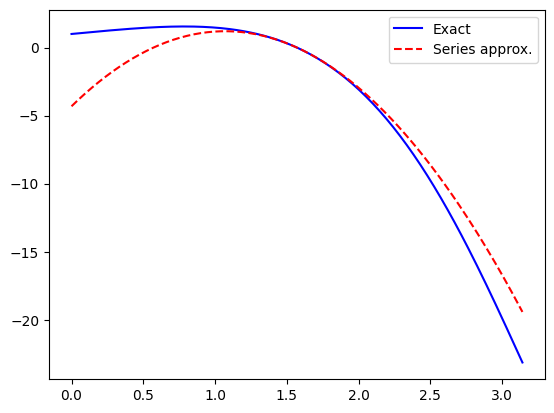

In [15]:
series_F = sp.lambdify(x, series_fn.removeO())  # Remove the "O()" term
xn = np.linspace(0, np.pi, 200)

plt.plot(xn, np.exp(xn) * np.cos(xn), color='blue', label='Exact')
plt.plot(xn, series_F(xn), color='red', linestyle='--', label='Series approx.')
plt.legend()

SymPy has a _lot_ of stuff in it - not as much as Mathematica, but still there are many tools available.  For physics applications there's an entire `sympy.physics` submodule with a lot of useful things!  A couple examples are below.  (There is _dimensional analysis_ code too, but if you really need that in Python I recommend [the `unyt` module](https://unyt.readthedocs.io/en/stable/) instead.)

In [16]:
from sympy.physics.paulialgebra import Pauli, evaluate_pauli_product
evaluate_pauli_product(Pauli(1)*Pauli(2))

I*sigma3

In [17]:
from sympy.physics.hydrogen import R_nl
from sympy.abc import r  # Shorthand for creating one-letter vars

R_nl(2,0,r)

sqrt(2)*(2 - r)*exp(-r/2)/4

In [18]:
sp.integrate(R_nl(3,1,r)**2 * r**2, (r, 0, sp.oo))

1

## What we didn't see

Unfortunately, one semester isn't nearly enough to see all of the features of the Python language (especially when we're learning physics applications too!)  The major built-in features of Python that we never got around to look at are:

* Object-oriented programming (in any detail)
* Exception handling
* Concurrent execution and networking

and a scattering of smaller advanced constructions like _decorators_, _generators_, and other fancy things that can be used to write smarter, more efficient code.  

We also never talked about __user interfaces__; there are a lot of different ways to get everything from simple text input up to complex graphical user interfaces.  For scientific research, we're usually building code for ourselves as a tool, so it's not so important to make it easy for many other people to use.

I won't tell you anything about concurrent execution and networking - enabling our programs to do multiple things at once really complicates how we have to think about flow control.  But that topic is the path to _supercomputing_ - parallel execution of really expensive calculations on thousands of processors at once.

## What next?

Step one is __install Python on your own system!__  I recommend using the [standard library’s virtual environment tool](https://packaging.python.org/en/latest/guides/installing-using-pip-and-virtual-environments/) `venv` and the `pip` Python package manager.


The [Anaconda](https://anaconda.org/) distribution is another simple way to get up and running.

You can do 100% of your Python development using Jupyter alone.  But for larger-scale projects, it's often better to switch to a dedicated code-editing application.  Most such programs function as __integrated development environments__, or "IDEs", which come with extra tools for debugging by looking into the internal state of your program as it's running.

There are tons of choices, but I recommend looking at one or more of the following:

* [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/): another interface to Jupyter, meant to be an upgrade of ordinary Jupyter that's better for working with projects that have multiple files.
* [Spyder](https://www.spyder-ide.org): a dedicated Python-only IDE.  Comes pre-packaged with Anaconda.  Bit of a learning curve, but powerful.
* [Visual Studio Code](https://code.visualstudio.com): VSCode is what many of us use for research programming.  Simple to start using, but incredibly deep and powerful.  Supports user-written extensions to assist with almost any programming task.  Written for multiple languages, not just Python.


From here, there are multiple paths depending on what you really want to get out of programming.  If you just want to learn more programming in general:

* For Python specifically, work through the [big Python book](http://shop.oreilly.com/product/0636920028154.do) "Learning Python (5th edition)" by Mark Lutz and you'll be an expert in all things Python!
* There are lots of free code exercises out there to build up your programming ability.  Some of the most well-known are [Project Euler](https://projecteuler.net) (math-oriented), [Google Code Jam](https://codingcompetitions.withgoogle.com/codejam/) and the [Advent of Code](https://adventofcode.com)
* Learn and use a __version control system__, which is an infinitely more powerful version of "undo": it lets you track, branch, and rewind incremental changes to your code.  Git is the gold standard, especially powered by [GitHub](https://github.com), which is a hosting service for code repositories.  (You can all get a free academic account as CU students!)
* Learn and use a __container system__, like [Docker](http://docker.com) or (for Python specifically) [conda environments](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html), which can help to ensure that your code is portable, reproducible, and will last into the future.  (And it can save you a lot of headaches from conflicting Python libraries installed in different places...)

Finally: this is a Python course, and I've tried to emphasize the power and flexibility of Python.  But if you're really considering a career which involves computing, you should almost certainly know how to use __more than one programming language__.  (For a given task, some languages may be better suited than others!  And knowing other languages will help to expand your computing intuition.)  Here are my recommendations:

1. If you are interested in __high-performance computing__ (computational research), I recommend [__C++__](https://isocpp.org) as your next language.  C++ is a compiled language which is mature, fast, and well-tested, and is the _de facto_ standard for writing efficient code that runs on the largest supercomputers in the world.
2. If you want to __expand your mind__, I recommend [__Elixir__](https://elixir-lang.org) as your next language.  Elixir is a _functional programming_ language from the ground up; functional programming is the most challenging paradigm for new programmers, but can give very powerful and robust solutions to certain types of problems.  (Elixir is especially good at fault-tolerance and extreme concurrency; among other uses, it is used on the back-end for Discord.)
3. If you want to be __on the cutting edge__, I recommend [__Nim__](https://nim-lang.org) as your next language.  Nim is a compiled language, but it is designed to have Python-like syntax and with extremely powerful "meta-programming" features (think: code that writes other code.)  Nim is a _transpiled_ language, which means it compiles first to C or JavaScript code - this gives it great interoperability with other libraries in those languages.


One last word is on _quantum computing_.  I was sorely tempted to include a lecture on this, because it's a rapidly-developing field and there's lots of physics in it!  But I think it's hard to fully appreciate and start to think about quantum computing until you've had a quantum mechanics class.  In fact, we now have a quantum computing class in physics, __PHYS 3090__!  

Coding is not a pre-requisite for PHYS 3090, but may help you gain a deeper appreciation, because there are several Python modules for playing with quantum computing:

- Rigetti Computing has an open-source software stack for quantum computing, including [a Python interface called PyQuil](https://pyquil.readthedocs.io/en/latest/), which generates instructions that can run on either a "quantum virtual machine" (i.e. a simulated quantum computer) or on real quantum hardware.
- [Qiskit](https://qiskit.org) is another open-source quantum computing library for Python, from IBM Research.
- Google has yet another quantum computing Python module called [Cirq](https://cirq.readthedocs.io/en/latest/), which seems more geared towards simulating quantum circuits.
- It's not Python, but Microsoft has a dedicated quantum computing programming language called Q#, as part of their [quantum development kit](https://www.microsoft.com/en-us/quantum/development-kit).